## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_results = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
combined_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
combined_results["Mouse ID"].count()

1893

In [3]:
#Checking columns variable types
combined_results.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_results.loc[combined_results.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df= combined_results.drop_duplicates(["Mouse ID","Timepoint"],keep=False)
clean_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df["Mouse ID"].count()

1883

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straightforward, creating multiple series and putting them all together at the end.
drug_regimen= clean_mouse_df.groupby("Drug Regimen")
drug_regimen["Tumor Volume (mm3)"].count()
drug_regimen_mean= drug_regimen["Tumor Volume (mm3)"].mean()
drug_regimen_median= drug_regimen["Tumor Volume (mm3)"].median()
drug_regimen_var= drug_regimen["Tumor Volume (mm3)"].var()
drug_regimen_std= drug_regimen["Tumor Volume (mm3)"].std()
drug_regimen_sem= drug_regimen["Tumor Volume (mm3)"].sem()

drug_regimen_stats = drug_regimen.agg(Mean=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="mean"),
                                      Median=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="median"),
                                      Variance=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="var"),
                                      St_Deviation=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="std"),
                                      Sem=pd.NamedAgg(column="Tumor Volume (mm3)", aggfunc="sem"))                                                                                                                              
drug_regimen_stats

,Mean,Median,Variance,St_Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
statistics_mouse= clean_mouse_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg(["mean","median","var","std","sem"])


stats_mouse_df = statistics_mouse.rename(columns = {"mean":"Mean","median":"Median",
                                                    "var":"Variance", "std":"St_Deviation","sem":"Sem"})
stats_mouse_df

Tumor Volume (mm3)                                             
                           Mean     Median   Variance St_Deviation       Sem
Drug Regimen                                                                
Capomulin             40.675741  41.557809  24.947764     4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177     6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684     6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577     8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479     8.134708  0.596466
Placebo               54.033581  52.288934  61.168083     7.821003  0.581331
Propriva              52.458254  50.854632  44.053659     6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704     4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562     7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355     6.966589  0.516398

## Bar Plots

In [9]:
mice_bar_analysis = clean_mouse_df.groupby(["Drug Regimen","Timepoint"])
mice_bar_counts_df = mice_bar_analysis.agg(Mouse_Count=pd.NamedAgg(column="Mouse ID", aggfunc="count"))
mice_bar_counts_df


Mouse_Count
Drug Regimen Timepoint             
Capomulin    0                   25
             5                   25
             10                  25
             15                  24
             20                  23
...                             ...
Zoniferol    25                  16
             30                  15
             35                  14
             40                  14
             45                  14

[100 rows x 1 columns]

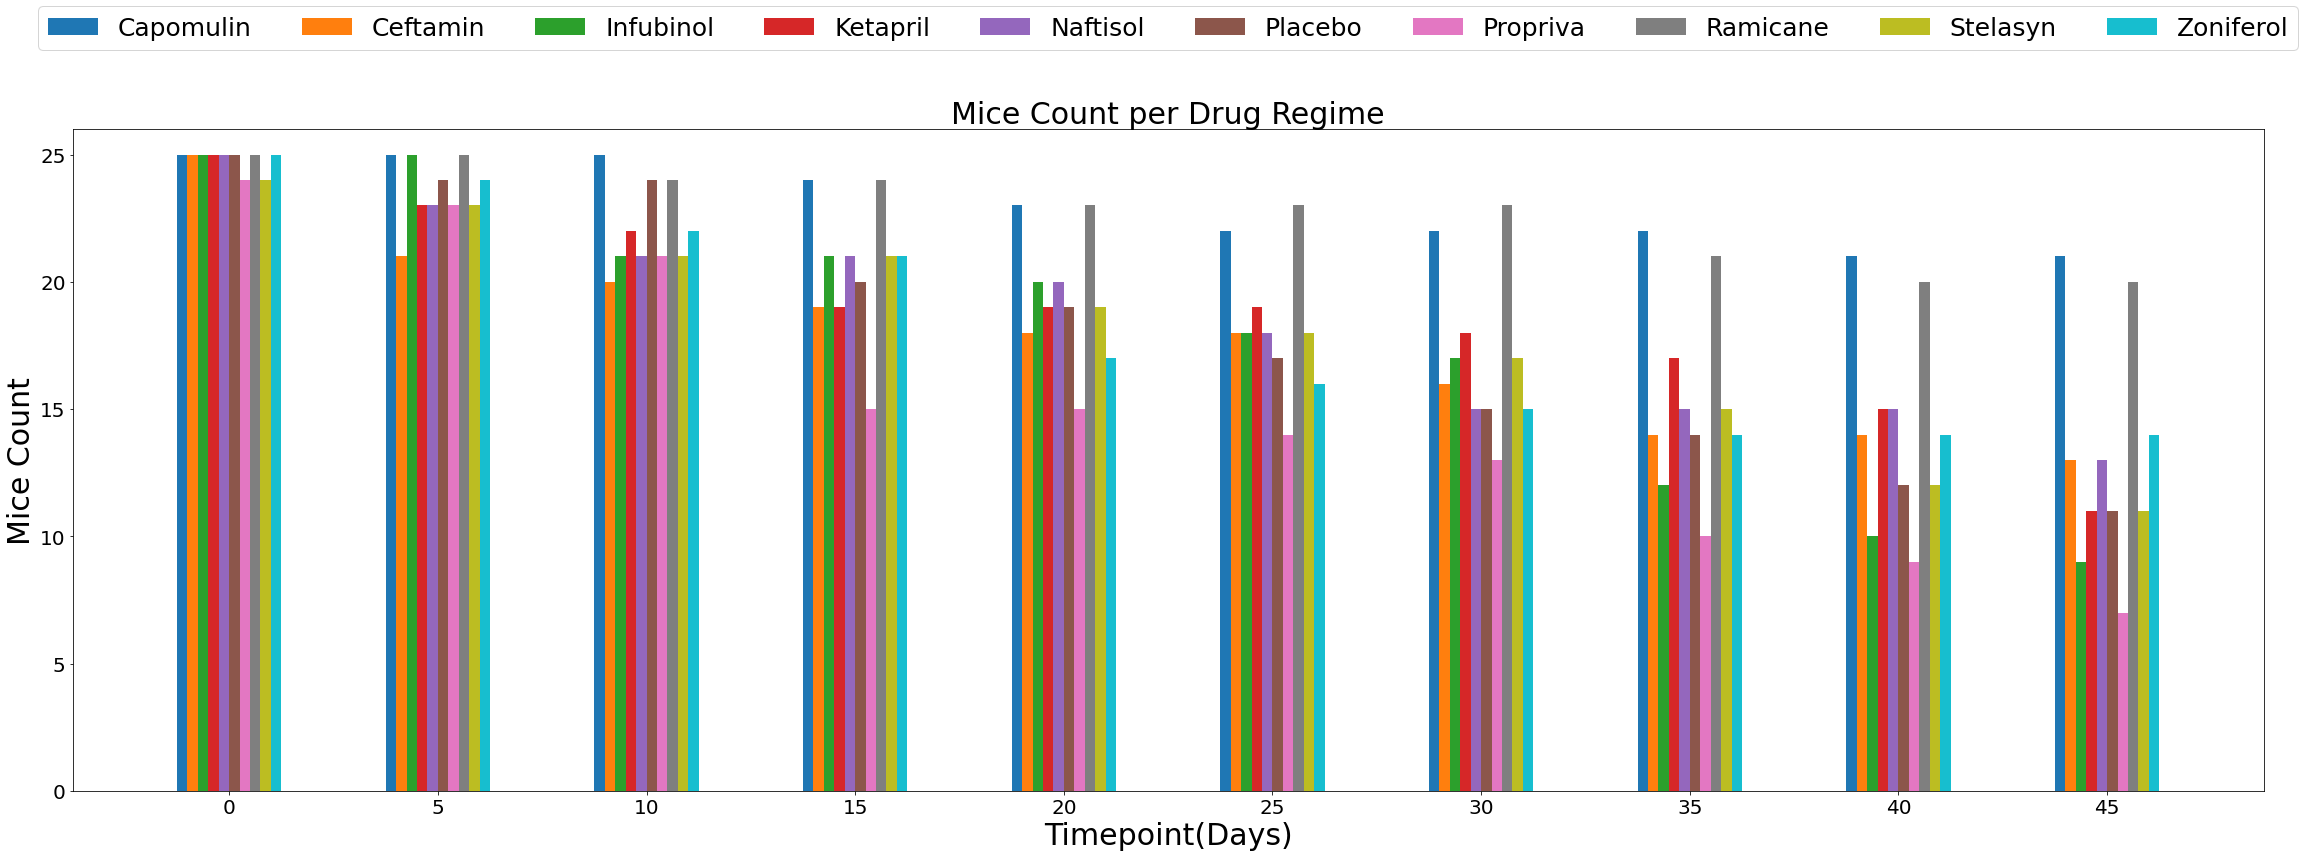

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
labels= mice_bar_counts_df.index.get_level_values(0).unique()
mice_bar_counts_df.unstack(0).plot(kind="bar",figsize=(35,12))
plt.legend(loc="lower center",bbox_to_anchor=(0.5,1.1),ncol=10,fancybox=True,fontsize=25,labels=labels)
plt.title("Mice Count per Drug Regime",fontsize=30)
plt.ylabel("Mice Count",fontsize=30)
plt.xlabel("Timepoint(Days)",fontsize=30)
plt.xlim(-0.75,len(mice_bar_counts_df)/10-0.25)
unique_mice_count= mice_bar_counts_df["Mouse_Count"].unique()
plt.tick_params(axis="y",labelsize=20)
plt.tick_params(axis="x",labelsize=20,rotation=0)
plt.ylim(0,len(unique_mice_count)+8)
plt.tight_layout()
plt.show()




In [11]:
mice_bar_df= mice_bar_analysis["Mouse ID"].count()
mice_bar_df= mice_bar_df.reset_index()
labels= mice_bar_df["Timepoint"].unique()
mice_bar_df

,Drug Regimen,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [12]:
regimens= mice_bar_df["Drug Regimen"].unique()
timepoints= mice_bar_df["Timepoint"].unique()
x = np.arange(len(timepoints)) 
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

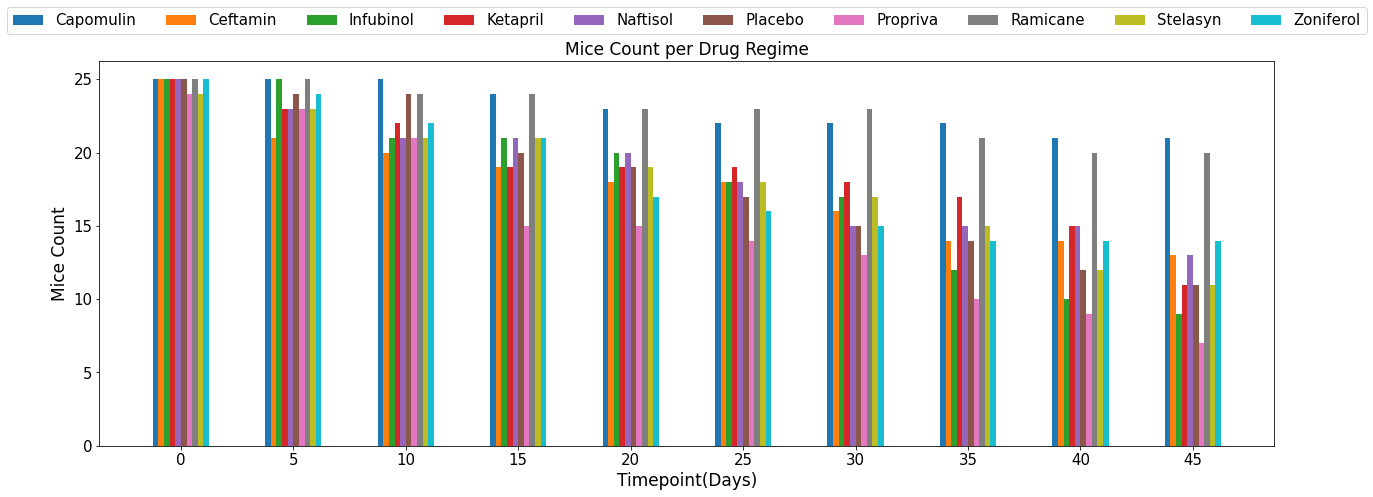

In [13]:
d={}

for regimen in regimens:
     d[str(regimen)]=mice_bar_df.loc[mice_bar_df["Drug Regimen"]==regimen]["Mouse ID"]
# the label locations
x = np.arange(len(timepoints)) 
labels = timepoints
# the width of the bars
width = 0.05

fig, ax = plt.subplots(figsize=(20, 7))
w=0
for regimen in regimens:
    ax.bar(x+(-4.5+w)*width, d[str(regimen)],width, label=str(regimen))
    w+=1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mice Count',fontsize=17)
ax.set_xlabel('Timepoint(Days)',fontsize=17)
ax.set_title('Mice Count per Drug Regime',fontsize=17)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=15)
ax.tick_params(axis="y",labelsize=15)
ax.legend(loc="lower center",bbox_to_anchor=(0.5,1.05),ncol=10,fancybox=True,fontsize=15)
fig.tight_layout()
plt.show()
    
     
   


## Pie Plots

In [14]:
#distribution of female versus male mice
sex_distribution= clean_mouse_df.groupby("Sex")
mice_gender= sex_distribution["Mouse ID"].count()
mice_gender_df= mice_gender.reset_index()
gender_list= list(mice_gender_df["Sex"])
mice_gender_df

,Sex,Mouse ID
0,Female,925
1,Male,958


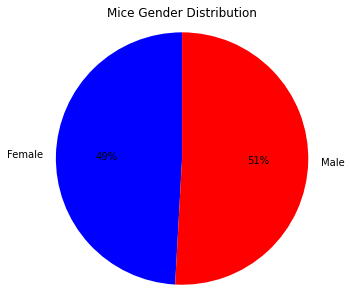

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie= mice_gender.plot.pie(y="Mouse ID",autopct='%1.0f%%',startangle=90, radius=0.5, title="Mice Gender Distribution",
                            colors=["blue","red"],figsize=(5, 5))
gender_pie.set_ylabel(" ")
plt.axis("equal")
plt.show()
plt.tight_layout()

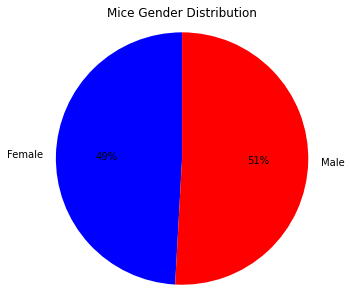

In [55]:

labels=mice_gender_df["Sex"]
sizes= mice_gender_df["Mouse ID"]
colors=["blue","red"]

fig, ax = plt.subplots(figsize=(5,5))

ax.pie(sizes,labels=labels,colors=colors,autopct='%1.0f%%',startangle=90, radius=0.5)
ax.set(title='Mice Gender Distribution')
ax.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [56]:
clean_mouse_df["Timepoint"].value_counts()

0     248
5     236
10    221
15    205
20    193
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
total_tumor_volume= clean_mouse_df.loc[(clean_mouse_df["Timepoint"]==45)&((clean_mouse_df["Drug Regimen"]=="Capomulin")|(clean_mouse_df["Drug Regimen"]=="Ramicane")\
                                                                         |(clean_mouse_df["Drug Regimen"]=="Infubinol")|(clean_mouse_df["Drug Regimen"]=="Ceftamin"))]
quartiles= total_tumor_volume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
lowerq= quartiles[0.25]
upperq= quartiles[0.75]
iqr= upperq-lowerq

print(f"The lower quartile of the Total Tumor Volume is: {lowerq}")
print(f"The upper quartile of the Total Tumor Volume is: {upperq}")
print(f"The interquartile range of the Total Tumor Volume is: {iqr}")
print(f"The the median of the Total Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
total_tumor_volume

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Ramicane
capomulin_box_df=total_tumor_volume.loc[(clean_mouse_df["Drug Regimen"]=="Capomulin")]
ramicane_box_df=total_tumor_volume.loc[(clean_mouse_df["Drug Regimen"]=="Ramicane")]
infubinol_box_df=total_tumor_volume.loc[(clean_mouse_df["Drug Regimen"]=="Infubinol")]
ceftamin_box_df=total_tumor_volume.loc[(clean_mouse_df["Drug Regimen"]=="Ceftamin")]

fig1,axs = plt.subplots(2,2)

axs[0,0].boxplot(capomulin_box_df["Tumor Volume (mm3)"])
axs[0,1].boxplot(ramicane_box_df["Tumor Volume (mm3)"])
axs[1,0].boxplot(infubinol_box_df["Tumor Volume (mm3)"])
axs[1,1].boxplot(ceftamin_box_df["Tumor Volume (mm3)"])
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
